In [1]:
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
def svd(M):
    u,s,v = np.linalg.svd(M,full_matrices=False)
 
    return u, s, v

In [2]:
data=[]
labels=[]
for i in range(1,41):
    for j in range(1,11):
        img_path=f'G:/face_identification/Face/Face/ORL_Faces/s{i}/{j}.pgm'
        img = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img,(110,90))
        data.append(np.array(img).flatten())
        labels.append(i)

In [3]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 2

In [4]:
#打乱
state = np.random.get_state()
np.random.shuffle(data)
np.random.set_state(state)
np.random.shuffle(labels)

In [5]:
X_train,X_test,y_train,y_test = train_test_split(data,labels,test_size=0.1,random_state=10)

In [6]:
X_train = np.array(X_train)
mean = X_train.mean(axis=0)
X_train=(X_train-mean)/255
U,S,Vt = svd(X_train.T)
U=U[:,:60]
eigenfaces = U.T @ X_train.T

In [7]:
print(eigenfaces)
print(eigenfaces.shape)

[[ 1.46345609 -1.27003415 -9.59844538 ...  9.57017372 -4.6802687
  10.88960011]
 [13.60999621 -2.37683263 -4.70129361 ...  4.24641986 -6.0866825
   1.76320974]
 [ 5.49976222  0.92581832  0.26565026 ...  3.91375102  3.43244805
   1.47725193]
 ...
 [ 0.32362457 -0.8078479   0.10134874 ... -1.08868984 -0.40478589
  -0.3946913 ]
 [ 0.04586924  0.29977952  0.29477766 ...  0.66295577 -0.64897274
   0.45364876]
 [-0.77940831  0.26569283 -0.11475055 ... -1.11699815  0.19945387
  -0.10035675]]
(60, 360)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(eigenfaces.T,y_train)

KNeighborsClassifier()

In [10]:
X_test=np.array(X_test)
X_test = (X_test-mean)/255
test_eigenfaces=U.T@X_test.T
y_pred = knn.predict(test_eigenfaces.T)

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(y_test,y_pred))
print(metrics.accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          18       1.00      1.00      1.00         3
          19       1.00      1.00      1.00         1
          21       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          23       1.00      0.67      0.80         3
          25       1.00      1.00      1.00         1
          27       1.00      1.00      1.00         3
          28       1.00      1.00      1.00         1
          31       1.00      1.00      1.00         1
          32       1.00    

In [13]:
error_rates=[]
for i in range(1,21):
    knn_t=KNeighborsClassifier(n_neighbors=i)
    knn_t.fit(eigenfaces.T,y_train)
    y_pred = knn_t.predict(test_eigenfaces.T)
    tt=metrics.accuracy_score(y_test,y_pred)
    error_rates.append(tt)

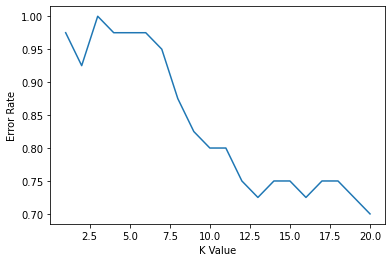

In [14]:
k_values=range(1,len(error_rates)+1)
plt.plot(k_values,error_rates)
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.show()

In [15]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=0)
X_test_tsne = tsne.fit_transform(X_test)
X_train_tsne = tsne.fit_transform(X_train)

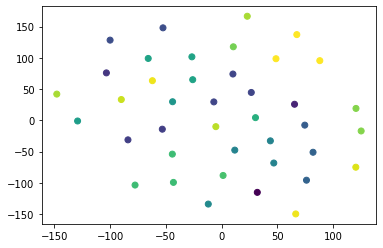

In [16]:
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=y_test)
plt.show()

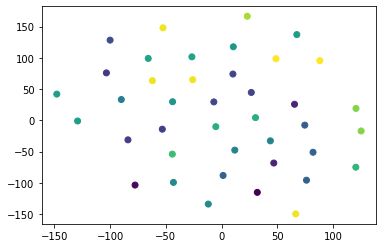

In [17]:
plt.scatter(X_test_tsne[:,0],X_test_tsne[:,1],c=y_pred)
plt.show()

In [31]:
import random
def generate_points(num_points):
    # 平面模型：y = ax + b
    a, b = 0.5, 1
    # 随机生成x坐标
    x = np.random.uniform(-10, 10, size=num_points)
    # 计算对应的y坐标
    y = a * x + b
    # 加入随机噪声
    noise = np.random.normal(0, 1, size=num_points)
    y += noise
    # 返回点集
    return np.column_stack((x, y))
def ransac_line_fit(data, n, k, t, d):
    """
    使用 RANSAC 算法拟合二维平面上的直线

    :param data: 数据集，每个数据点为 [x, y] 的形式
    :param n: 随机抽样的数据点数目
    :param k: 最大迭代次数
    :param t: 判定模型是否适合的阈值
    :param d: 选出的内点数目达到该值则认为模型适合
    :return: 直线斜率和截距
    """

    bestfit = None
    besterr = np.inf

    for i in range(k):
        # 随机选择n个数据点
        sample = random.sample(list(data), n)

        # 拟合直线
        x1, y1 = sample[0]
        x2, y2 = sample[1]
        if x2 == x1:
            continue
        k_estimate = (y2 - y1) / (x2 - x1)
        b_estimate = y1 - k_estimate * x1
        
        # 计算误差
        errors = []
        for j in range(len(data)):
            x, y = data[j]
            if x2 == x1:
                continue
            distance = abs((y - y1) - k_estimate * (x - x1)) / np.sqrt(1 + k_estimate**2)
            errors.append(distance)

        # 找到内点
        inliers = np.array([data[j] for j in range(len(errors)) if errors[j] < t])

        # 如果内点数目大于阈值d，重新拟合模型
        if len(inliers) >= d:
            x_inliers = inliers[:, 0]
            y_inliers = inliers[:, 1]
            k_inliers, b_inliers = np.polyfit(x_inliers, y_inliers, 1)
            errors = []
            for j in range(len(data)):
                x, y = data[j]
                distance = abs((y - b_inliers) - k_inliers * x) / np.sqrt(1 + k_inliers**2)
                errors.append(distance)

            # 更新最佳模型
            mean_error = np.mean(errors)
            if mean_error < besterr:
                bestfit = (k_inliers, b_inliers)
                besterr = mean_error

    return bestfit

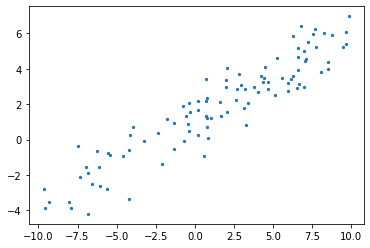

In [32]:
tt_1=generate_points(100)
plt.scatter(tt_1[:,0],tt_1[:,1],s=5)
plt.show()

In [40]:
k,b=ransac_line_fit(tt_1,n=5,k=300, t=5,d=70)
print("拟合的直线方程为y={:.2f}*x+{:.2f}".format(k,b))

拟合的直线方程为y=0.46*x+1.26


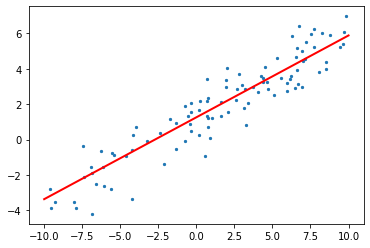

In [41]:
plt.scatter(tt_1[:,0],tt_1[:,1],s=5)
x_fit=np.linspace(-10,10,5)
y_fit=k*x_fit+b
plt.plot(x_fit,y_fit,color='r',linewidth=2)
plt.show()